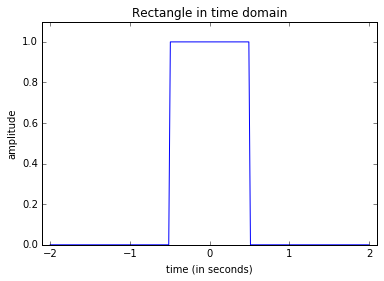

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


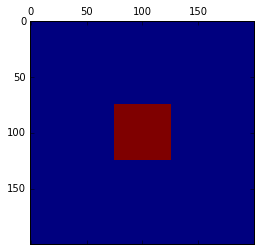

/home/jhribar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:79: RuntimeWarning: divide by zero encountered in log


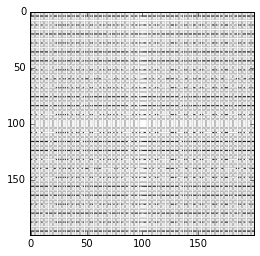

In [3]:
'''
1. Look at the FDTD diffraction and interface simulation video at 
https://www.youtube.com/watch?v=6QLj8_f9QYg&spfreload=5

2. Download, install and play with program yourself
http://lnmaurer.github.io/Interference-Inference-Interface/

3. Use the Fourier transform approximation of Fraunhofer diffraction to simulate the 
diffraction patterns of some rectengular, circular, and other shaped apertures.

[Rememeber to plot intensity which is the square of the magnitude of the complex amplitude G(x,y)]
[Hint: to get started try 1/(λz) = 1, e.g. λ = 532 * x^-9 m and z = 1.879699 * 10^6 m. ]

'''
# The code from LAB2 with Discrete FFT 

%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
import math
from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq
# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq
import matplotlib.cm as cm
# Rectangle:
start_time = -2
stop_time = 2
time_to_plot = 4 # seconds
sample_rate = 50 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

rect = np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -0.5) & (t[i] < 0.5)):
        rect[i] = 1
    elif((t[i] == 0.5) &(t[i] == -0.5)):
        rect[i] = 0.5
    else:
        rect[i] = 0

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Rectangle in time domain')
plt.axis([-2.1, 2.1, 0,1.1])
plt.plot(t, rect)
plt.show()



rect1 = np.asmatrix(rect)
rect2D=np.dot(np.transpose(rect1),rect1)

print(rect2D)
plt.matshow(rect2D)
plt.show()

# Get the FT 

rect2Dft = fftshift(fft2(rect2D))

ps_rect2Dft = np.abs(rect2Dft)**2

#print(ps_rect2Dft)
ps_rect2DftP = plt.figure()
axirect2DftP = ps_rect2DftP.add_subplot(1,1,1)
axirect2DftP.imshow(np.log(ps_rect2Dft), cmap=cm.Greys_r)